In [7]:
# Motor Imaginary Data

In [1]:
import scipy.io
file_name = 'D:/MotorIm/BCI_db/data/预处理后/BinaryData/A03T_left.mat'

epoch_eeg = scipy.io.loadmat(file_name)['bci_l']
print(epoch_eeg.shape)

(22, 1250, 72)


In [2]:
import math
import numpy as np

trial = epoch_eeg[:,:,10]  # nchannel * time points

# EEG stack
m = trial.shape[0]  # 行
n = trial.shape[1]  # 列
nstack = math.ceil(n*2 / (m+2))

aug_trial = np.array(trial[:,0:n-nstack+0+1])
for st in range(1, nstack):
    aug_trial = np.vstack((aug_trial, trial[:,st:n-nstack+st+1]))
print(nstack)
print(aug_trial.shape)

105
(2310, 1146)


In [3]:
from mne.baseline import rescale
from mne.time_frequency import (tfr_multitaper, tfr_stockwell, tfr_morlet,
                                tfr_array_morlet, tfr_array_stockwell, tfr_array_multitaper)
from mne.viz import centers_to_edges

In [12]:
sampleRate = 250

epoch_trial = np.array([trial])
print(epoch_trial.shape)   #  (n_epochs, n_channels, n_times)
freqs = np.arange(0.1, 120.0, 3.)
n_cycles = freqs / 2.
vmin, vmax = -3., 3.  # color limits.

power = tfr_array_morlet(epoch_trial, sfreq=sampleRate,
                         freqs=freqs, n_cycles=n_cycles,
                        output='power')
# (n_epochs, n_channels, n_freqs, n_times)
print(power.shape)

power = np.log(power)

(1, 22, 1250)
(1, 22, 40, 1250)


Applying baseline correction (mode: mean)


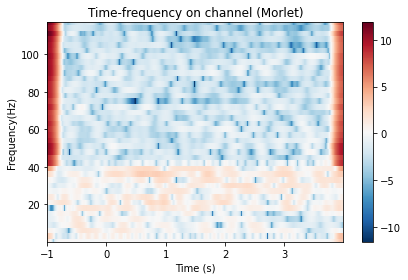

In [13]:
import matplotlib.pyplot as plt

dt = 1/sampleRate
times = np.arange(-250,1000) * dt

rescale(power, times, (-1., 0), mode='mean', copy=False)

fig, ax = plt.subplots()
x, y = centers_to_edges(times, freqs)
mesh = ax.pcolormesh(x, y, power[0][1], cmap='RdBu_r')
ax.set_title('Time-frequency on channel (Morlet)')
ax.set(ylim=freqs[[0, -1]], xlabel='Time (s)', ylabel='Frequency(Hz)')
fig.colorbar(mesh)
plt.tight_layout()

# plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

file_path = 'D:/BCI_RL/important/ErrP/DMD/code/IncDMD/'
sub = ['1', '2', '3', '4', '5', '6']
ses = ['1', '2']
file_name = file_path+'Subject0'+sub[2]+'_s'+ses[0]+'.mat'

epoch_eeg = scipy.io.loadmat(file_name)['errorTrial']
print(epoch_eeg.shape) 

(64, 900, 99)


28
(1792, 873)


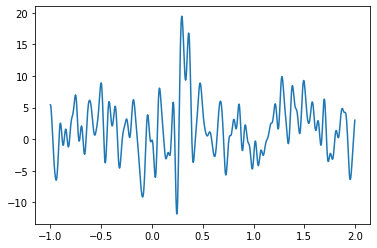

In [2]:
import math 

trial = epoch_eeg[:,:,3]  # nchannel * time points

dt = 1/300

# EEG stack
m = trial.shape[0]  # 行
n = trial.shape[1]  # 列

times = np.arange(-300,600)*dt
plt.plot(times, trial[46,:])

nstack = math.ceil(n*2 / (m+2))

aug_trial = np.array(trial[:,0:n-nstack+0+1])
for st in range(1, nstack):
    aug_trial = np.vstack((aug_trial, trial[:,st:n-nstack+st+1]))
print(nstack)
print(aug_trial.shape)

In [3]:
from pydmd import DMD

channel = 46
# -1----2s
# 初始阶段
sampleRate = 300
dt = 1 / sampleRate
bidx = int(0.8*sampleRate)

fbpack = []
# 动态更新数据矩阵以及DMD算子
for i in range(0, len(aug_trial[0])-bidx+1):  # len(aug_trial[0])-bidx+1
    seg_trial = aug_trial[:, i:bidx+i]
    
    dmd = DMD(svd_rank=0, tlsq_rank=100, exact=True, opt=True)
    dmd.fit(seg_trial)
    dmd_f = dmd.frequency / dt
    dmd_b = dmd.amplitudes
    dmd_phi = dmd.modes[channel, :]
    
    bphi = np.multiply(dmd_b, dmd_phi)
    
    idx = [i for i in range(len(dmd_f)) if dmd_f[i]>= 1 and dmd_f[i]<25]
    bphi = bphi[idx]
    f = dmd_f[idx]   # 只包含正频率点
    
    fb = list(zip(f[:], bphi[:]))
    fb.sort(key=lambda x:x[0])
    fbpack.append(fb)

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 457363469.3092011. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 457251799.52401584. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 457195423.42842066. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 457090221.1719751. Consider preprocessing data, passing in augmented data matrix, or regularization m

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 447474618.6374568. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 446701318.69601226. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 445921553.96162844. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 445327183.99757314. Consider preprocessing data, passing in augmented data matrix, or regularization 

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 440219892.8445238. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 439737586.69807845. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 439346831.29656786. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 439064123.60014534. Consider preprocessing data, passing in augmented data matrix, or regularization 

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 434555299.52220917. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 434226396.1161497. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 433762964.67943513. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 433325407.2384255. Consider preprocessing data, passing in augmented data matrix, or regularization m

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 398773896.15817344. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 397631604.43774575. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 396729225.76526594. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 395675792.8695743. Consider preprocessing data, passing in augmented data matrix, or regularization 

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 374605167.3539213. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 376770723.01773036. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 378727343.41772944. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 380883274.4536683. Consider preprocessing data, passing in augmented data matrix, or regularization m

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 438300780.1438189. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 439007281.07988906. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 440133157.6906309. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 440460657.517085. Consider preprocessing data, passing in augmented data matrix, or regularization met

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 401030412.8834586. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 401208783.47116363. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 402471960.4011701. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 403249210.6142277. Consider preprocessing data, passing in augmented data matrix, or regularization me

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 409204505.3720162. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 408739981.988696. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 408289006.37400436. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 407674926.8500666. Consider preprocessing data, passing in augmented data matrix, or regularization met

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 419070315.5979927. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 424674205.2664062. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 429325804.6433452. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 434351401.44081664. Consider preprocessing data, passing in augmented data matrix, or regularization me

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 456004117.6644925. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 456192466.21521056. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 456225231.1382977. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 456355831.24662447. Consider preprocessing data, passing in augmented data matrix, or regularization m

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 474721346.6128294. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 476910128.64164233. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 479597608.5866005. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 482500633.3373435. Consider preprocessing data, passing in augmented data matrix, or regularization me

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 543224551.062933. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 545216831.1271183. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 547065199.4262158. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 548607636.4454557. Consider preprocessing data, passing in augmented data matrix, or regularization meth

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 587709526.8273562. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 588564888.964008. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 589704767.5557935. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 590433365.7092893. Consider preprocessing data, passing in augmented data matrix, or regularization meth

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 581651913.4309347. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 579471202.921678. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 576924004.163409. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 574138259.5927141. Consider preprocessing data, passing in augmented data matrix, or regularization metho

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 520616852.9877044. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 520483328.5787625. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 522282225.756062. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 523453706.9111434. Consider preprocessing data, passing in augmented data matrix, or regularization meth

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 550098916.4706378. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 548167590.3091441. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 546307816.6441201. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 544354791.1926427. Consider preprocessing data, passing in augmented data matrix, or regularization met

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 510590991.37585974. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 510231429.5359653. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 509430546.2292785. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 508754471.08248967. Consider preprocessing data, passing in augmented data matrix, or regularization m

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 457236383.327738. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 456134387.1862687. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 456727114.0191553. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 457963821.7753915. Consider preprocessing data, passing in augmented data matrix, or regularization meth

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 546808557.0957464. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 547027776.4117144. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 546884855.3373643. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 547004882.4206702. Consider preprocessing data, passing in augmented data matrix, or regularization met

In [4]:
print(len(fbpack))  

634


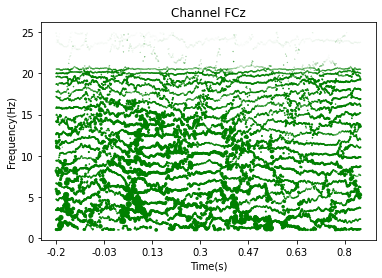

In [5]:
for i in range(0, len(aug_trial[0])-bidx+1): # len(aug_trial[0])-bidx+1
    ft, bphit = [], []
    for j in range(len(fbpack[i])):
        ft.append(fbpack[i][j][0])
        bphit.append(abs(fbpack[i][j][1]))
    plt.scatter(np.ones((1,len(bphit)))*i, ft, s=bphit, c='g')
locs, labels = plt.xticks()
plt.xticks(ticks=range(0,634,100), labels=np.round(list(np.linspace(-0.2,0.8,7)),2))
plt.title('Channel FCz')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.show()

In [6]:
print(locs)

[-100.    0.  100.  200.  300.  400.  500.  600.  700.]


In [7]:
print(list(range(0,634,100)))

[0, 100, 200, 300, 400, 500, 600]


In [8]:
print(len(aug_trial[0])-bidx+1)

634


In [9]:
# correct

In [10]:
file_path = 'D:/BCI_RL/important/ErrP/DMD/code/IncDMD/'
sub = ['1', '2', '3', '4', '5', '6']
ses = ['1', '2']
file_name = file_path+'Subject0'+sub[2]+'_s'+ses[0]+'cor.mat'

epoch_eeg = scipy.io.loadmat(file_name)['correctTrial']
print(epoch_eeg.shape) 

(64, 900, 395)


28
(1792, 873)


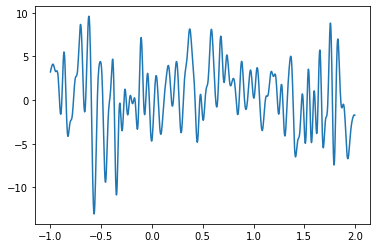

In [11]:
trial = epoch_eeg[:,:,4]  # nchannel * time points

dt = 1/300

# EEG stack
m = trial.shape[0]  # 行
n = trial.shape[1]  # 列

times = np.arange(-300,600)*dt
plt.plot(times, trial[46,:])

nstack = math.ceil(n*2 / (m+2))

aug_trial = np.array(trial[:,0:n-nstack+0+1])
for st in range(1, nstack):
    aug_trial = np.vstack((aug_trial, trial[:,st:n-nstack+st+1]))
print(nstack)
print(aug_trial.shape)

In [12]:
channel = 46
# -1----2s
# 初始阶段
sampleRate = 300
dt = 1 / sampleRate
bidx = int(0.8*sampleRate)

fbpack = []
# 动态更新数据矩阵以及DMD算子
for i in range(0, len(aug_trial[0])-bidx+1):  # len(aug_trial[0])-bidx+1
    seg_trial = aug_trial[:, i:bidx+i]
    
    dmd = DMD(svd_rank=0, tlsq_rank=100, exact=True, opt=True)
    dmd.fit(seg_trial)
    dmd_f = dmd.frequency / dt
    dmd_b = dmd.amplitudes
    dmd_phi = dmd.modes[channel, :]
    
    bphi = np.multiply(dmd_b, dmd_phi)
    
    idx = [i for i in range(len(dmd_f)) if dmd_f[i]>= 1 and dmd_f[i]<25]
    bphi = bphi[idx]
    f = dmd_f[idx]   # 只包含正频率点
    
    fb = list(zip(f[:], bphi[:]))
    fb.sort(key=lambda x:x[0])
    fbpack.append(fb)

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 332637753.26808274. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 334120486.55747706. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 334789551.7781149. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 335797743.2083563. Consider preprocessing data, passing in augmented data matrix, or regularization m

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 333731411.5220743. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 331736845.2828857. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 329344430.5689317. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 327277624.53414434. Consider preprocessing data, passing in augmented data matrix, or regularization me

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 306268438.3568398. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 307443560.2817088. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 308580209.39519686. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 309522157.3523628. Consider preprocessing data, passing in augmented data matrix, or regularization me

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 303336244.0757727. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 303475453.9992204. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 303612934.8208685. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 303799061.69311553. Consider preprocessing data, passing in augmented data matrix, or regularization me

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 243051415.9259663. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 243837307.69385785. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 244414511.4825497. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 245553554.98854125. Consider preprocessing data, passing in augmented data matrix, or regularization m

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 237314851.01993427. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 237209190.1607513. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 237158984.03705484. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 237384885.73792952. Consider preprocessing data, passing in augmented data matrix, or regularization 

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 312467504.9835394. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 315997219.02615535. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 319664571.81364626. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 323513493.9557178. Consider preprocessing data, passing in augmented data matrix, or regularization m

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 389749306.2777885. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 391976550.66311175. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 394129470.4040154. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 396322578.5978243. Consider preprocessing data, passing in augmented data matrix, or regularization me

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 429950971.88366586. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 429160057.5513129. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 428642420.8526433. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 427900418.7828208. Consider preprocessing data, passing in augmented data matrix, or regularization me

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 414155170.19566125. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 411635458.65077436. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 408925265.24593574. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 406717292.22255546. Consider preprocessing data, passing in augmented data matrix, or regularization

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 383188072.9106433. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 383471263.28484815. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 384059232.0483654. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 384655282.8964164. Consider preprocessing data, passing in augmented data matrix, or regularization me

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 411439677.50523823. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 412415035.3701353. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 412850106.79770213. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 412411673.68894815. Consider preprocessing data, passing in augmented data matrix, or regularization 

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 350664746.88208026. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 351867249.3052252. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 354141602.8310596. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 355749697.5445049. Consider preprocessing data, passing in augmented data matrix, or regularization me

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 361750770.29466647. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 360202855.41813403. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 358831155.285599. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 357098663.17849714. Consider preprocessing data, passing in augmented data matrix, or regularization m

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 297886414.90105224. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 294540041.0223007. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 291558248.95923054. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 288538331.14422584. Consider preprocessing data, passing in augmented data matrix, or regularization 

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 288500270.6324276. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 288913953.2713733. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 289192589.6537239. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 289466244.0690082. Consider preprocessing data, passing in augmented data matrix, or regularization met

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 294494509.4750472. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 294854445.63754344. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 295080322.69266874. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 294610380.9081396. Consider preprocessing data, passing in augmented data matrix, or regularization m

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 322270894.0757209. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 322985759.13732934. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 323520403.79478484. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 324218659.7030665. Consider preprocessing data, passing in augmented data matrix, or regularization m

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 324967846.7062472. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 326227524.9460515. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 327065689.3360755. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 328425915.10669327. Consider preprocessing data, passing in augmented data matrix, or regularization me

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 365775143.38637656. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 366809456.7780512. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 368985175.6313318. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


In [13]:
print(len(fbpack))

634


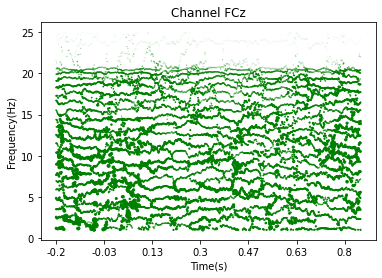

In [14]:
for i in range(0, len(aug_trial[0])-bidx+1): # len(aug_trial[0])-bidx+1
    ft, bphit = [], []
    for j in range(len(fbpack[i])):
        ft.append(fbpack[i][j][0])
        bphit.append(abs(fbpack[i][j][1]))
    plt.scatter(np.ones((1,len(bphit)))*i, ft, s=bphit, c='g')
locs, labels = plt.xticks()
plt.xticks(ticks=range(0,634,100), labels=np.round(list(np.linspace(-0.2,0.8,7)),2))
plt.title('Channel FCz')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.show()

In [ ]:
# Motor Imaginary

In [15]:
import scipy.io
file_name = 'D:/MotorIm/BCI_db/data/预处理后/BinaryData/A03T_left.mat'

epoch_eeg = scipy.io.loadmat(file_name)['bci_l']
print(epoch_eeg.shape)

(22, 1250, 72)


105
(2310, 1146)


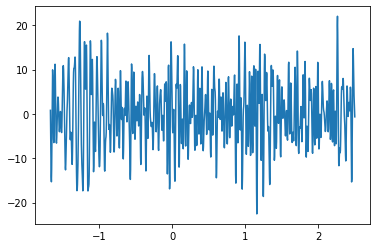

In [17]:
import math
import numpy as np

trial = epoch_eeg[:,:,10]  # nchannel * time points

# EEG stack
m = trial.shape[0]  # 行
n = trial.shape[1]  # 列
nstack = math.ceil(n*2 / (m+2))

aug_trial = np.array(trial[:,0:n-nstack+0+1])
for st in range(1, nstack):
    aug_trial = np.vstack((aug_trial, trial[:,st:n-nstack+st+1]))
print(nstack)
print(aug_trial.shape)

times = np.arange(-500,750)*dt
plt.plot(times, trial[10,:])

In [22]:
from pydmd import DMD

channel = 10
# -1----2s
# 初始阶段
sampleRate = 250
dt = 1 / sampleRate
bidx = int(1.2*sampleRate)
print(bidx)

fbpack = []
# 动态更新数据矩阵以及DMD算子
for i in range(0, len(aug_trial[0])-bidx+1):  # len(aug_trial[0])-bidx+1
    seg_trial = aug_trial[:, i:bidx+i]
    
    dmd = DMD(svd_rank=0, tlsq_rank=130, exact=True, opt=True)
    dmd.fit(seg_trial)
    dmd_f = dmd.frequency / dt
    dmd_b = dmd.amplitudes
    dmd_phi = dmd.modes[channel, :]
    
    bphi = np.multiply(dmd_b, dmd_phi)
    print(len(bphi))
    
    idx = [i for i in range(len(dmd_f)) if dmd_f[i]>= 5 and dmd_f[i] <= 35]
    bphi = bphi[idx]
    f = dmd_f[idx]   # 只包含正频率点
    
    fb = list(zip(f[:], bphi[:]))
    fb.sort(key=lambda x:x[0])
    fbpack.append(fb)

300
131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2945310.010086926. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2947488.839980015. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2948041.804077798. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2946689.7605099017. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2944340.398264021. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2940735.3767748764. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2937551.192016052. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2936449.665212942. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2944089.7335847067. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2954402.747213854. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2965161.3261398715. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2976960.589723573. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2989104.5383149595. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2991861.123728236. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2989545.155783697. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2986561.320073713. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2983422.8593390016. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2979415.1300867056. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2976720.786512876. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2981696.253850808. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2984285.055027223. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2983953.5988651556. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2982980.2966384357. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2982053.8300778465. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2975577.5500616445. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2963892.187081275. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2949246.4098782185. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2933832.2817987325. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2912121.302615131. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2892688.484131689. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2879723.8664838625. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2871100.1032520365. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2862531.1118256785. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2852919.429283996. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2840051.756890933. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2821517.974795571. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2801639.7485003974. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2778405.454438053. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2753041.7706247857. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2728302.2290283856. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2707906.498940073. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2695261.970960756. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2684101.5319728656. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2673955.294309475. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2663358.632147664. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2651778.027354473. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2640330.3145150854. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2626922.2291624504. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2610097.5005372535. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2593258.7825197834. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2576282.38206125. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2560791.4286747915. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2558905.487594959. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2561319.9421023866. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2562092.4148845566. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2560260.809992992. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2555586.135437827. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2547850.7972839805. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2536412.5199181703. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2522279.2069232045. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2504985.1353861373. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2486600.1152458345. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2467749.741054386. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2458472.841931239. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2458022.966371051. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2457527.5241162274. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2455404.6691161995. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2450663.351210314. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2442752.134004575. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2431834.2635767017. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2419909.8412670167. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2406718.0109560126. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2389412.975849637. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2366935.524672551. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2345352.715230338. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2339780.623315679. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2341352.0061934474. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2342557.65229577. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2336422.293512622. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2329269.22395711. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2317870.7351023536. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2301333.3906354243. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2280079.8997124885. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2271489.981368898. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2259956.49218183. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2244628.6374434824. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2225541.3089662367. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2219988.313797466. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2219889.7214793195. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2218774.593268267. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2214779.901981518. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2207085.2383696623. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2194929.27907198. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2179325.9211855815. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2160158.009820551. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2138343.434269705. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2115334.588343728. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2091644.8675020908. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2072919.5248116474. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2076196.2119237022. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2076875.9268270005. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2074782.9500124245. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2069126.0168320271. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2060391.6273141606. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2047023.4770842113. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2030487.2115305844. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2008958.4293437602. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1984146.6293553927. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1957184.1577890106. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1933183.3229687386. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1933864.7734203946. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1935282.6292697475. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1933152.6377499194. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1931066.5108179115. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1926661.0004093598. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1918364.7357446314. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1910398.2226592414. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1898765.4187504256. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1883811.374107559. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1870746.3289439192. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1859593.9003808093. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1857857.2159041455. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1867320.7676857475. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1874021.1217011532. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1878135.275097773. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1879339.7104245713. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1877171.4724114041. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1875202.4164270412. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1867519.164716963. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1857972.4953319607. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1849510.5190478843. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1838323.6615497768. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1823653.7632654426. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1823338.0741138402. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1832769.9161142271. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1840103.051814938. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1843852.0654354836. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1842977.6017940377. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1837216.290706889. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1828415.0383706752. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1817606.7689406758. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1805637.9733505049. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1793895.226229595. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1781373.5750519068. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1767765.1037615503. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1760974.0389372325. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1763752.622106842. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1766004.8434132403. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1766757.0261174783. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1763893.9947558637. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1757557.8253509065. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1748237.140291399. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1737344.5300514707. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1725287.8513896228. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1710112.0141029644. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1694568.0277630629. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1680812.2800526829. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1676865.745094773. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1677299.7201358422. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1677360.8710114688. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1675551.3476226556. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1672399.2447318807. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1668906.1708754613. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1665612.0218547622. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1662431.0666813704. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1659632.5831544655. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1657064.0004048254. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1652805.8835077763. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1647844.2487221877. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1653041.8934355313. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1660602.1194975884. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1666628.6570310746. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1670861.5929434022. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1674806.9889401246. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1678200.8396077058. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1679246.3875083274. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1681692.8410757405. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1683222.7770692334. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1685943.5250088049. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1690476.5570687572. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1697182.1392234638. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1702416.1443437596. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1707024.9237839717. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1711147.1175935292. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1713702.2021611969. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1715990.2270935504. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1716299.7377410175. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1714548.5529224416. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1712556.6570392216. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1711812.9292415706. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1712753.2416340045. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1715895.246388462. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1718891.2817712158. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1720526.1314680087. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1721267.659191278. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1721751.2839517565. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1721909.7333631017. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1721819.627397463. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1721262.8926931396. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1720647.0489206542. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1720073.413196038. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1719359.2581735472. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1718920.8149854585. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1718288.9084440328. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1717485.9136962092. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1716092.3617684606. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1714892.8394538485. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1714052.9525345182. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1712036.018429823. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1710389.4324666958. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1708437.737344124. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1706241.0228241994. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1703314.3773654546. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1701282.3472818735. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1698907.7467046482. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1696805.266547772. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1695016.5965107528. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1693124.5627520632. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1690664.059623525. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1687654.1452895245. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1683630.746464534. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1679561.9562928337. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1675377.9793040755. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1672907.585145983. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1670010.7050341335. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1667808.2340258318. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1666595.7727880958. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1665774.7271994469. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1664900.0841725785. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1663614.8829625344. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1661714.4783569516. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1659325.2820889915. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1656244.8710648078. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1652410.495067037. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1648546.0870505732. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1645396.767874982. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1643406.5198210469. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1641915.3224874095. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1640983.6693066442. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1639925.765003934. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1638493.8566687398. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1635582.5336868463. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1632075.1720746446. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1626810.4739130028. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1620340.5342738323. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1612534.9400839105. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1604749.9276646355. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1599693.2576904872. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1596402.4406341428. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1592527.5412607323. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1587950.1806908874. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1582032.3005031052. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1574242.6558116542. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1565207.3022427883. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1555292.3072552427. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1544689.2999136096. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1535469.9523789627. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1527704.2492355055. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1522739.2322511158. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1520875.3706579416. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1519939.5465247715. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1518419.3250716128. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1515151.496099424. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1509170.1711669466. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1501075.482128957. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1491334.383929563. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1480206.7755658235. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1470064.0541359086. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1465056.4228143971. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1464579.0394308665. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1464924.6481672914. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1464511.1231706848. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1462961.4166797851. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1460385.022709218. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1456582.2916646458. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1451590.5313253647. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1445521.4612750981. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1437838.2196954205. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1428285.6936537034. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1416536.9854885924. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1408080.8985395436. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1408052.2117472184. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1407005.6583267534. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1404505.0325493193. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1400951.3513319737. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1397713.334777412. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1396383.1308172657. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1396502.258849181. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1396686.3780345821. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1397447.4931620024. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1397713.9333895247. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1396802.8795424453. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1394474.1898491092. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1390891.1013040396. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1387809.1925409834. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1386919.8381740006. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1385605.458304626. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1383232.4122412503. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1380656.3840625256. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1378809.0039249635. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1377969.5658776832. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1376930.1776917125. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1374692.499627564. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1372410.0937345603. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1371659.869010003. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1370832.3262699. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1369304.0001167904. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1366480.8769280906. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1364228.937587479. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1364661.6494180837. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1365088.4615429891. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1362585.8798900142. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1357766.4346279746. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1353694.2137992105. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1351957.6234453616. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1349576.1459416812. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1345941.0916668952. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1340417.1972945558. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1336536.178444276. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1334019.7169962253. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1331421.3229083214. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1327282.0599073078. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1322332.535094689. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1320361.4660906577. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1319885.3318188586. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1318381.1295858445. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1315442.999848245. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1312152.9557805306. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1309617.6086750224. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1309078.1022108358. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1307859.4924234354. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1306273.2790708812. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1304198.34185092. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1302554.9725397502. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1301773.8935610624. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1301552.1253485049. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1301631.047228257. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1301665.492788801. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1301569.3690911399. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


137


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1301905.6811349657. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1302772.5559522107. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1303761.954412532. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1302949.906490563. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1302096.1510404001. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1302408.5979555564. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1303896.8818905212. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


137


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1304814.477845105. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1304306.4203452452. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1304703.8384383738. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1306376.6920590424. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1308208.7429910838. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1308508.1808629353. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1309042.781907251. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


137


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1311243.959358894. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1314178.7188429139. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1315955.0059829107. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1317262.8175704214. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1319162.6032171606. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1321836.4392099027. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1324544.9047238764. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1326101.9942802312. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1326534.2663684816. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1327845.6404702617. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1330321.9193445682. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1331553.674392934. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1331147.220481287. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1330404.953009841. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1332491.0898931718. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1333863.410689666. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1332869.184618911. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1330418.381889686. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1329268.8270394166. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1330400.0025845068. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1329971.1459388568. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1324725.6349629443. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1319459.6822328402. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1320765.1523817286. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1321468.34922313. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1321255.411167927. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1320057.144225005. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1322290.3602701274. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1325749.751951747. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1326693.1914773488. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1325644.9955436692. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1329181.3507182717. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1335452.7600956429. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1339273.643567678. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1340237.348654064. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1339753.6916144977. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1347045.1946559506. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1352981.0010243307. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1356082.6285989727. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1357256.8218939772. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1358837.3871218546. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1363737.0693519367. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1366254.250559348. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1366752.5530438917. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1366068.700132079. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1370596.2447779516. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1374672.4389066487. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1376774.3448213087. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1377526.9717854445. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1382142.656204985. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1386611.6857007956. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1388656.6105862258. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1388689.192423957. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1388780.872280775. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1393641.5999703268. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1396438.2931102556. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1396481.7915615248. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1394826.3976566065. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1395465.1856168355. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1397488.4775408127. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1397765.2180056183. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1396344.250051902. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1394311.7384937615. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1396260.4847868516. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1396387.8431946065. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1394077.6250852875. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1390375.4731348145. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1390178.9736561424. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1391190.494863982. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1391400.3767041783. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1390618.343938997. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1389886.1490967998. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1389614.7615450087. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1389737.3129670795. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1390103.6039615571. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1390635.1968147953. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1389855.8757271012. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1388126.1150426245. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1386879.5203782953. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1387441.2821597205. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1387016.3390884274. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1385040.5764386721. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1383578.0222956156. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1384252.3132011003. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1383074.0482376816. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1380302.6455806023. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1377374.3069512886. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1376059.6195849618. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1372510.478056345. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


137


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1364363.2179172914. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1357173.350940571. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1348982.7361262315. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1344302.1594833129. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1336729.019855733. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1328473.8572422988. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1331428.533353084. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


137


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1334737.1915384445. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1335352.8031686002. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1334319.0535082656. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1334531.2316350394. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1340583.3907825372. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1343031.3147403046. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1341227.1333940655. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


138


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1341447.0760642474. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1349330.2990524436. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1353541.2095284981. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1351814.4691545272. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1347485.3756033508. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1353445.8435927704. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1358361.148506882. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


137


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1359791.1815419944. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1360004.8329381428. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1366109.8467883857. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1378815.7194918075. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1387181.735907153. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1389707.0498244872. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1396050.1748656677. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1410776.0189333954. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1421264.289170406. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1425260.3467040204. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


136


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1426166.676854216. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1440948.1329398048. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1454663.6469611535. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1461302.0509702174. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1459064.3702487675. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1455809.2243950693. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1461260.1632704504. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1459426.2744022303. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1453455.554391843. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1453417.7581132862. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1467637.5168406104. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1478838.8905977046. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1482619.6365332876. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1483172.1330186885. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1492265.2902728498. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1501738.2051530187. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1504498.202783014. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1501839.12550611. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1501160.6137002942. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1506700.5791774446. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1507415.7767817976. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1504852.6454105028. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1502417.9501427019. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1507451.2606286746. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1509578.972830352. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1507011.3769830642. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1507215.0389896545. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1512613.1577118163. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1521962.4863248898. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1529703.863691572. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1534916.8471309307. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1537828.5668993094. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1547100.2446106707. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1553800.3879326994. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1557091.7376425576. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1556803.9925320863. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1562256.209575047. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1572654.5749231915. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1586859.0169195828. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1598047.62854484. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1610551.7465154878. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1627204.37803638. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1641600.8596644315. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1648250.8330677063. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1650850.230438573. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1654557.2691593221. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1659622.2705936304. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1662276.8258257334. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1663750.838865073. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1667977.6649939585. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1675506.241126179. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1683956.82303985. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1687445.005230392. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1688371.1747447376. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1692993.3002611704. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1696233.7382061095. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1696844.3225886286. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1695912.5037675395. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1697883.06191709. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1701948.8275441881. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1703893.007239161. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1704201.278002961. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1705850.0056273302. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1709534.8119480344. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1712574.038056415. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1711304.5840940266. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1707717.797501739. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1710394.4166751015. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1714002.2119617963. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1717096.5536503773. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1718706.570002455. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1718716.3365184262. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1719861.0843872174. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1717962.6588787271. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1711461.5881744104. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1703366.7877607748. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1692303.817584855. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1686067.9666471137. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1686742.5525750937. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1686922.866683154. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1687027.8653114906. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1690089.9485055264. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1692405.5264036907. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1695651.482942552. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1700234.3412303338. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1706277.2095273621. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1711996.6486123975. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1718473.5362029742. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1723098.5868943508. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1727720.6209667313. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1734200.1282657639. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1742362.2904923125. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1749013.7384903291. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1753318.1668663707. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1758882.4829368377. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1768263.033061044. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1774969.3086831886. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1779932.2413653885. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1782034.0066767489. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1787405.6076730315. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1793133.0954503545. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1796691.3639516064. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1798385.5135385431. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1799074.3439842698. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1801589.836227275. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1804548.7967922492. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1806234.7033059082. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1805611.2292911618. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1805498.4872208335. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1806913.9236646118. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1806964.6339700425. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1804893.551004681. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1803099.1033187641. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1807182.2275471801. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1812554.7330141333. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1818081.7469361187. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1820186.0640385444. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1822277.6036437408. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1825184.8188692713. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1826468.1777642332. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1825531.5638067992. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1824176.3238816794. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1826032.8265786308. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1828358.666939376. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1828438.7227916834. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1827652.1052220392. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1830069.4311882316. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1834190.261125495. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1836959.2814389057. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1837563.7249997952. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1837833.6592771318. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1840894.3153869342. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1843613.3166401926. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1843585.8971048496. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1840531.003043329. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1837492.0085140879. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1838026.0404905865. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1840380.6851290113. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1840547.014136695. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1841943.0472433702. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1849608.2902165542. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1860112.6707040875. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1872655.8388389265. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1881989.610923024. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1887743.957990688. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1893182.7974394273. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1895245.7751389886. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1895081.8899837532. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1892738.7829412364. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1891554.3832108662. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1898848.0021807342. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1907795.1840310495. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1916796.6307606907. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1926644.8950856493. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1936309.275865768. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1943910.1806177646. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1948350.0179138489. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1948826.4786735973. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1950316.7874452157. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1953276.661432915. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1954224.0486525798. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1953774.023548743. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1955812.733441544. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1961880.2879295128. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1968044.9966726566. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1969516.9404995856. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1971479.1144877563. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1970933.1492287884. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1971199.4552153267. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1970287.623979402. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1969412.171827113. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1978084.441309162. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1991022.5112730653. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2003684.3483675383. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2015032.7273669925. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2025820.985782525. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2037633.410429884. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2048479.1534986882. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2058141.4685297415. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2065325.6238788385. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2072998.988059231. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2078400.8114673723. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2081760.567907691. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2083074.2657318756. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2085378.341303033. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2087159.5279031543. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2086986.9711649225. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2086446.585651829. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2086653.9647620323. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2086711.6636799478. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2087686.3439782136. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2089716.092350852. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2091303.730353395. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2094401.0038839143. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2097535.9198647775. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2099931.296612032. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2102694.039673381. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2104011.398345789. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2103778.5771002076. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2103461.683873951. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2103725.191751909. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2103355.9053771626. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2101826.1983435433. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2100517.927934386. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2099826.659524414. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2099060.2781910887. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2096355.4271024119. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2092433.369601627. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2090201.9822197563. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2089192.249513696. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2087225.078977653. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2082464.8052355635. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2078491.8557674703. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2078059.501091531. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2079416.1920665721. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2078174.812307689. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2073492.8938649623. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2068545.597406931. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2065547.3721238873. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2061555.8777136297. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2057024.6012560758. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2053547.296317696. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2051002.550501936. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2047026.0304053891. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2039416.7705830557. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2028210.0911783886. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2017403.5662482043. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2010622.877416679. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2003762.020761629. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1996170.054122808. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1992009.901414517. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1994970.0423849276. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1997119.4959344398. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1999922.3929512324. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2006073.0785458372. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2020003.7207986945. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2031694.8356575882. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2042247.83475911. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2047508.555756661. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2053934.6287431228. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2060643.5865351802. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2060127.7289000112. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2056298.0463485713. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2048743.5351700194. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2050661.4820709513. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2049434.6666048176. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2046172.2203874954. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2041511.1879354103. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2046418.8699755913. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2055332.722314204. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2058696.8840290785. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2055274.2284798874. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2053046.737626034. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2057969.8676084725. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2060249.1729578269. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2057934.851474328. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2055068.0475528948. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2061097.8567828124. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2068166.9307950197. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2070082.5162026912. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2066711.9544659639. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2067428.3834587757. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2070347.0387929736. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2068246.8557715414. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2061611.0394998821. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2056810.0286124202. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2059894.0203034556. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2060019.3984946923. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2054628.653677229. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2045226.0410185743. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2048628.3987625055. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2050442.2676926993. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2046320.5514001227. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


131


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2037241.8505251373. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2032950.4725659876. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2034266.9365068367. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2028490.5209451618. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 2015047.8730223677. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1999737.4391499886. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1995472.6880413124. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1987076.946639449. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1974899.874622785. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1958233.5501873565. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1949130.098509434. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1941986.9184291195. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1932927.4006821064. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1922943.1943207756. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1918556.7336077238. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1924265.4423485787. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1926121.1015161723. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1922134.3433025682. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1918458.1692505316. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1922355.2730179878. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1922614.661480209. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1916816.7298229886. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1908383.4898524175. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1907204.0900675796. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1905311.3259625502. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1897198.7088219686. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1885557.7845061552. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1876790.0662615637. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1872710.4342870729. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1865429.66520816. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1853967.5886159898. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1845644.5486222508. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1843628.8706711724. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1839801.4033123753. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1832657.870700523. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1825569.3213064228. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1824902.9648836304. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1822717.5896052432. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1814733.1108368544. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1803239.131980253. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1798839.1529350283. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1793747.529823738. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1784277.9972321757. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1769942.215634113. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1760085.1362468265. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1754814.000716955. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1747184.8054840066. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1735684.4338978347. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1726973.4690987112. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1726042.1149072. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1723533.201438528. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1715125.0919020912. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1709213.8756344372. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1709961.8798468148. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1706184.757730281. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1696523.126709311. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1681328.0788266424. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1681203.6380972518. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1680061.4672672206. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1672953.975105499. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1659895.797873099. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1650683.1448034297. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1652179.7370682247. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1652473.4987696754. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1650333.0376661357. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1649404.3352402125. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1645338.6647309964. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1636188.5381170823. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1620837.4800547184. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1613251.2583537318. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1605114.1642944044. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1592513.5051644428. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1574669.464368819. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1549686.9756949435. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1519400.9713405906. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1514727.3430579267. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1513497.5043024719. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1513866.811992831. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1518606.9270502566. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1523219.8217812835. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1523520.6739021188. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1528163.380193757. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1532117.983044119. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1534498.7068608387. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1531068.9840669036. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1520286.7430671223. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1500614.1387419677. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1473353.5242619466. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1471637.1157693742. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1476362.8987001667. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1477982.3113590598. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


135


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1477889.7199867396. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1476535.5421799473. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1475901.486763648. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1478608.3602156406. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1479551.7886881786. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1478310.4641061788. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1473048.5694202227. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


134


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1461593.6024675858. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


132


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1442250.1642421444. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


133


In [25]:
print(len(fbpack))

847


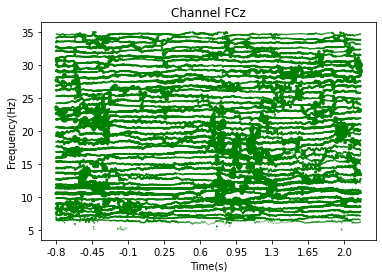

In [32]:
for i in range(0, len(aug_trial[0])-bidx+1): # len(aug_trial[0])-bidx+1
    ft, bphit = [], []
    for j in range(len(fbpack[i])):
        ft.append(fbpack[i][j][0])
        bphit.append(abs(fbpack[i][j][1]))
    plt.scatter(np.ones((1,len(bphit)))*i, ft, s=bphit, c='g')
locs, labels = plt.xticks()
# print(locs, labels)
plt.xticks(ticks=range(0,847,100), labels=np.round(list(np.linspace(-0.8,2.0,9)),2))
plt.title('Channel FCz')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.show()